In [2]:
import requests
import pandas as pd
import numpy as np
import json 
get_ipython().system('conda install -c conda-forge folium=0.5.0 --yes')


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.10

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-5.0.0               |     pyhd8ed1ab_0         363 KB  conda-forge
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.10            |          2_cp310           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    widgetsnbextension-3.5.2   |  py310hff52083_1         1.3 MB  conda-forge
    ------------------------------------------------------------
              

ModuleNotFoundError: No module named 'geopy'

In [4]:
import folium #Grafcar mapas
import matplotlib.pyplot as plt
import seaborn as sns 
!pip install textblob
from geopy.geocoders import Nominatim #Obtener coordenadas a partir de una direccion.
!pip install textblob
from textblob import TextBlob   #Analsiis de sentimientos para reseñas de los restaurantes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 56.2 MB/s eta 0:00:00


In [5]:
CLIENT_ID = '55S2ZJJJVK3T1D1ZDNQLHEAH15HG4AHHMYJZNETKJK5EXKBB' # su ID de Foursquare
CLIENT_SECRET = 'NRH3ODLT453CFZY2C0P33DJEDKCXROHBNC1OQSMT52ST3TD4' # su Secreto de Cliente de Foursquare
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 55S2ZJJJVK3T1D1ZDNQLHEAH15HG4AHHMYJZNETKJK5EXKBB
CLIENT_SECRET:NRH3ODLT453CFZY2C0P33DJEDKCXROHBNC1OQSMT52ST3TD4


<h2>Ubiquemos Pizzerias</h2>
Creamos la funcion para buscar pizzerias.

1 Definifion de la direccion<br>
2 Definicion de que es lo que se busca.<br>
3 Radio de busqueda

In [6]:
def get_restaurant_data(address, search_query, radius):
    # Use the Geocoding API to retrieve the latitude and longitude of the input address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude

    # Use the Foursquare API to search for restaurants within the specified radius of the input address
    url = f'https://api.foursquare.com/v3/places/search?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={latitude},{longitude}&v={VERSION}&query={search_query}&radius={radius}&limit={LIMIT}'
    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3a5oXiMEiuZYusTTUUGz8CHLfGZvmouDBQSuiyW4QVys="
    }
    results = requests.request("GET", url, headers=headers).json()

    # Create an empty list to store the extracted data
    data = []

    # Loop through the JSON response and extract the relevant fields
    for result in results['results']:
        fsq_id = result['fsq_id']
        name = result['name']
        distance = result['distance']
        latitude = result['geocodes']['main']['latitude']
        longitude = result['geocodes']['main']['longitude']
        category_name = result['categories'][0]['name']
        address = result['location']['formatted_address']

        if 'locality' in result['location']:
            locality = result['location']['locality']
        else:
            locality = None
        
        if 'region' in result['location']:
            region = result['location']['region']
        else:
            region = None
        
        # Append the extracted data to the list
        data.append([fsq_id, name, distance, latitude, longitude, category_name, address, locality, region])

    # Create a pandas DataFrame from the extracted data and set the column names
    df = pd.DataFrame(data, columns=['fsq_id', 'name', 'distance', 'latitude', 'longitude', 'category_name', 'address', 'locality', 'region'])
    return location, df

In [9]:
address = '60 Yorkville Avenue, Toronto, Ontario M4W 0A4 Canadá' #Parametro 1
search_query = 'pizza' #parametro 2
radius = 5000 #Parametro 3

loc, df = get_restaurant_data(address, search_query, radius)


In [10]:
latitude = loc.latitude
longitude = loc.longitude
hotel_name = loc.address.split(',')[0]
df

,fsq_id,name,distance,latitude,longitude,category_name,address,locality,region
0,4bd909a32e6f0f477ba10908,Pizza Pizza,990,43.665882,-79.380762,Pizzeria,"68 Wellesley St E, Toronto ON M4Y 1H2",Toronto,ON
1,4b80a2c1f964a520908230e3,Pizza Pizza,3627,43.640131,-79.381339,Pizzeria,"208 Queens Quay W, Toronto ON M5J 2Y5",Toronto,ON
2,4bd3a1c477b29c74f1619182,Pizza Pizza,3795,43.679718,-79.436012,Pizzeria,"950 St Clair Ave W, Toronto ON M6E 1A1",Toronto,ON
3,5615b6c4498e3c32c67ad78f,Blaze Pizza,1874,43.656609,-79.380128,Pizzeria,"10 Dundas St E, Toronto ON M5B 2G9",Toronto,ON
4,4ce805f68ef78cfa1675979b,Pizza Pizza,1680,43.657722,-79.381801,Pizzeria,"346 Yonge St, Toronto ON M5B 1R8",Toronto,ON
5,5644dbaa498e7f7534154326,Maker Pizza,2468,43.650207,-79.397949,Pizzeria,"55A Cameron St, Toronto ON M5T 2H1",Toronto,ON
6,4d7e5290dd4a6ea80d4d6725,Pizza Fresca,1846,43.657847,-79.401739,Pizzeria,"302 College St (at Robert St), Toronto ON M5T 1R9",Toronto,ON
7,4bec78acc43f2d7f80f0dbd9,Pizza Pizza,4965,43.671016,-79.328357,Pizzeria,"1252 Gerrard St E, Toronto ON M4L 1Y6",Toronto,ON
8,4ad4cba2f964a520d1fb20e3,Panago Pizza Inc,1570,43.658828,-79.384362,Pizzeria,"44 Gerrard St W (at Bay St.), Toronto ON M5G 2K2",Toronto,ON
9,4add4a97f964a520d26421e3,Pizza Gigi,1849,43.661693,-79.408292,Pizzeria,"189 Harbord St (at Lippincott), Toronto ON M5S...",Toronto,ON


Definicion de centro del mapa en relacion a la direccion establecida en el parametro 1, el parametro 1 sera graficado con color rojo, mientras que los resultados en color azul en el radio de busqueda definido.

In [11]:
# Create map centered on hotel location
hotel_map = folium.Map(location=[latitude, longitude], zoom_start=15)

# Add marker for hotel
folium.Marker(
    location=[latitude, longitude], 
    popup=hotel_name,
    icon=folium.Icon(color='red')
).add_to(hotel_map)

# Add markers for other points
for idx, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name']).add_to(hotel_map)

# Display the map
hotel_map

<h2>Funcion -  lugares mas cercanos</h2>
Definimos funcion para obtener data Frame para obtener los 5 lugares mas cercanos.

In [31]:
def get_closest_places(df):   
    # Sort the dataframe by distance
    df_sorted = df.sort_values(by='distance')

    # Get the 5 shortest distances
    df_shortest = df_sorted.head(10)
    return df_shortest

In [32]:
df_shortest = get_closest_places(df)
df_shortest

,fsq_id,name,distance,latitude,longitude,category_name,address,locality,region
17,5738ca80cd10b91a6747abde,Pi Co,189,43.669992,-79.389881,Pizzeria,"1200 Bay St, Toronto ON M5R 2A5",Toronto,ON
15,5dcf0bd2f1c28a0008bdc96d,La Pizza & la Pasta,267,43.669721,-79.388201,Pizzeria,"45 Bloor St W, Toronto ON M4W 1A5",Toronto,ON
11,4b958823f964a520d8a734e3,Pizza Nova,738,43.665419,-79.387142,Pizzeria,"1001 Bay St (St Joseph), Toronto ON M5S 3A6",Toronto,ON
16,5679e874498e50e824147816,Panago Pizza Inc,801,43.669208,-79.379795,Pizzeria,"570 Jarvis St (Charles St E.), Toronto ON M4Y 0C1",Toronto,ON
0,4bd909a32e6f0f477ba10908,Pizza Pizza,990,43.665882,-79.380762,Pizzeria,"68 Wellesley St E, Toronto ON M4Y 1H2",Toronto,ON
20,533d629b498e7452f4a50bda,North of Brooklyn Pizzeria,1123,43.664407,-79.380200,Pizzeria,"469 Church St (at Wellesley St.), Toronto ON M4Y 2C5",Toronto,ON
21,4ad4c05ff964a52014f720e3,Papa Ceo Fine Italian Foods & Pizza,1377,43.663240,-79.402460,Pizzeria,"654 Spadina Ave, Toronto ON M5S 2H7",Toronto,ON
18,524a5b79498e2a7a5945a8e1,Mamma's Pizza,1510,43.659261,-79.383028,Pizzeria,"Yonge St, Toronto ON",Toronto,ON
14,59ecdaae029a5529f5e8773c,Boston Pizza,1514,43.659335,-79.382011,Pizzeria,"401 Yonge St, Toronto ON M5B 1S9",Toronto,ON
8,4ad4cba2f964a520d1fb20e3,Panago Pizza Inc,1570,43.658828,-79.384362,Pizzeria,"44 Gerrard St W (at Bay St.), Toronto ON M5G 2K2",Toronto,ON



<h2>Funcion -  Funcion ranking , reviews</h2>
Definimos funcion para obtener ranking y reviews

In [14]:
def get_rate_reviews(fsq_id):
    """
    Function to get the rate and reviews of a place using the Foursquare API by the `fsq_id`.
    """
    url = 'https://api.foursquare.com/v3/places/{}?client_id={}&client_secret={}&v={}'.format(fsq_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3a5oXiMEiuZYusTTUUGz8CHLfGZvmouDBQSuiyW4QVys="
    }
    result = requests.request("GET", url, headers=headers).json()
    
    if 'rating' in result:
        rating = result['rating']
    else:
        rating = 'NA'
        
    if 'user_ratings_total' in result:
        reviews = result['user_ratings_total']
    else:
        reviews = 'NA'
    
    return rating, reviews

In [33]:
df_shortest = df_shortest.copy()
df_shortest[['rating', 'reviews']] = df['fsq_id'].apply(get_rate_reviews).apply(pd.Series)
df_shortest

,fsq_id,name,distance,latitude,longitude,category_name,address,locality,region,rating,reviews
17,5738ca80cd10b91a6747abde,Pi Co,189,43.669992,-79.389881,Pizzeria,"1200 Bay St, Toronto ON M5R 2A5",Toronto,ON,NA,NA
15,5dcf0bd2f1c28a0008bdc96d,La Pizza & la Pasta,267,43.669721,-79.388201,Pizzeria,"45 Bloor St W, Toronto ON M4W 1A5",Toronto,ON,NA,NA
11,4b958823f964a520d8a734e3,Pizza Nova,738,43.665419,-79.387142,Pizzeria,"1001 Bay St (St Joseph), Toronto ON M5S 3A6",Toronto,ON,NA,NA
16,5679e874498e50e824147816,Panago Pizza Inc,801,43.669208,-79.379795,Pizzeria,"570 Jarvis St (Charles St E.), Toronto ON M4Y 0C1",Toronto,ON,NA,NA
0,4bd909a32e6f0f477ba10908,Pizza Pizza,990,43.665882,-79.380762,Pizzeria,"68 Wellesley St E, Toronto ON M4Y 1H2",Toronto,ON,NA,NA
20,533d629b498e7452f4a50bda,North of Brooklyn Pizzeria,1123,43.664407,-79.380200,Pizzeria,"469 Church St (at Wellesley St.), Toronto ON M4Y 2C5",Toronto,ON,NA,NA
21,4ad4c05ff964a52014f720e3,Papa Ceo Fine Italian Foods & Pizza,1377,43.663240,-79.402460,Pizzeria,"654 Spadina Ave, Toronto ON M5S 2H7",Toronto,ON,NA,NA
18,524a5b79498e2a7a5945a8e1,Mamma's Pizza,1510,43.659261,-79.383028,Pizzeria,"Yonge St, Toronto ON",Toronto,ON,NA,NA
14,59ecdaae029a5529f5e8773c,Boston Pizza,1514,43.659335,-79.382011,Pizzeria,"401 Yonge St, Toronto ON M5B 1S9",Toronto,ON,NA,NA
8,4ad4cba2f964a520d1fb20e3,Panago Pizza Inc,1570,43.658828,-79.384362,Pizzeria,"44 Gerrard St W (at Bay St.), Toronto ON M5G 2K2",Toronto,ON,NA,NA


In [42]:
fsq_id = df_shortest['fsq_id'].iloc[1]
fsq_id

'5dcf0bd2f1c28a0008bdc96d'


<h2>Funcion -  Funcion tips</h2>
Definimos funcion para obtener reseñas

In [36]:
def get_tips(fsq_id):
    url = f'https://api.foursquare.com/v3/places/{fsq_id}/tips'
    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3a5oXiMEiuZYusTTUUGz8CHLfGZvmouDBQSuiyW4QVys="
    }
    result_tips = requests.request("GET", url, headers=headers).json()
    
    # Extract the tips information and create a DataFrame
    tips = []
    for item in result_tips:
        tips.append({
            'tip_id': item['id'],
            'created_at': item['created_at'],
            'text': item['text']
        })
    df_tips = pd.DataFrame(tips)
    
    return df_tips

In [43]:

pd.set_option('display.max_colwidth', None)
df_tips = get_tips(fsq_id)
df_tips

,tip_id,created_at,text
0,5dcc972b2658ab00069a32d4,2019-11-13T23:52:11.000Z,Best Pizza!!
1,5dcc96e050ef3d000698ff89,2019-11-13T23:50:56.000Z,Best pizza!!


Funcion para obtencion de analisis de sentimientos para obtener las mejores reseñas.

In [44]:
def analyze_sentiment(text):
    # Create a TextBlob object representing the text
    blob = TextBlob(text)
    # Get the polarity score
    polarity = blob.sentiment.polarity
    # Categorize as positive, negative, or neutral
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'
    
def add_sentiment_column(df):
    # Add a new column with the sentiment category for each text
    df['sentiment'] = df['text'].apply(analyze_sentiment)
    return df

Adicion de la funcion de sentimientos sobre el DF de reviews.

In [45]:
df_tips_sent = add_sentiment_column(df_tips)
df_tips_sent[['text', 'sentiment']]

,text,sentiment
0,Best Pizza!!,positive
1,Best pizza!!,positive


<h2>Funcion -  relacion de distancia</h2>
Definimos funcion para  relacion al radio de distancia a partir de la direccion de origen.

In [46]:
def create_distance_histogram(df):
    # Bin the restaurants based on distance in increments of 100 meters
    bins = range(0, df['distance'].max() + 100, 500)
    distance_binned = pd.cut(df['distance'], bins=bins)
    
    # Count the number of restaurants in each distance bin
    counts = distance_binned.value_counts().sort_index()
    
    # Plot the histogram with seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts.index.astype(str), y=counts.values)
    ax.set(xlabel='Distancia (m)', ylabel='Cantidad')
    ax.set_title('Numero de Restaurantes por Distancia')
    plt.show()

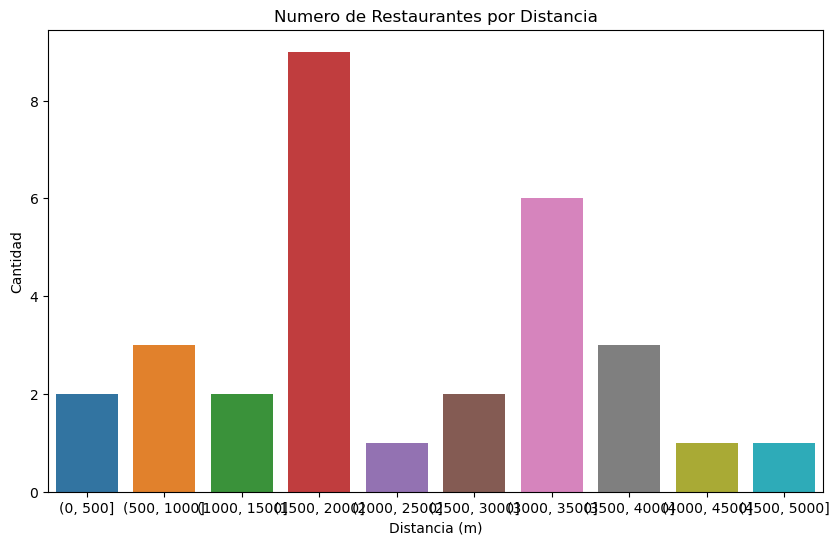

In [48]:
create_distance_histogram(df)

<h2>Ahora hagamos una comparacion de diferentes sitios para saber cuales tienen este tipo de restaurantes cerca</h2>

In [50]:
search_query = 'pizza'
radius = 1000

In [51]:
add1 = '33 Gerrard St W, Toronto, ON, M5G1Z4'
loc1, df1 = get_restaurant_data(add1, search_query, radius)

In [59]:

add2 = '1 King Street West, Toronto, ON, M5H1A1'
loc2, df2 = get_restaurant_data(add2, search_query, radius)

In [56]:
add3 = '55 Reading Crt, Toronto, ON, M9W7K7'
loc3, df3 = get_restaurant_data(add3, search_query, radius)

In [60]:
def get_names(loc):
    names = []
    for i in range(len(loc)):
        names.append(loc[i].address.split(',')[0])
    return names

hotel_names = get_names([loc1, loc2, loc3])

def create_distance_histogram_subplot(dfs, subplot_dim):
    nrows, ncols = subplot_dim
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))

    for i, df in enumerate(dfs):
        # Bin the restaurants based on distance in increments of 100 meters
        bins = range(0, 1250, 250)
        distance_binned = pd.cut(df['distance'], bins=bins)

        # Count the number of restaurants in each distance bin
        counts = distance_binned.value_counts().sort_index()

        # Plot the histogram with seaborn
        row = i // ncols
        col = i % ncols
        ax = sns.barplot(x=counts.index.astype(str), y=counts.values, ax=axs[row, col])
        plt.subplots_adjust(hspace=0.3)
        ax.set(xlabel='Distancia (m)', ylabel='Cantidad')
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
        ax.set_title(f'Numero de Restaurantes alrededor del\n {hotel_names[i]}')

    plt.show()

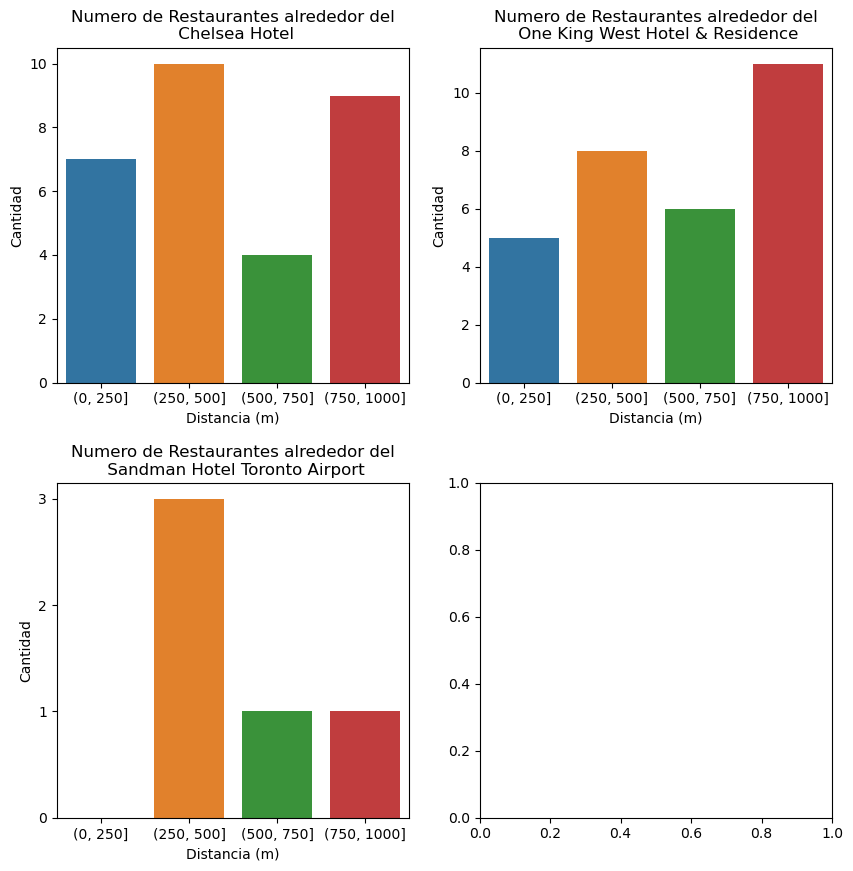

In [61]:
dfs = [df1, df2, df3]
create_distance_histogram_subplot(dfs, (2, 2))